In [19]:
batch_sizes = [16, 24, 32]
optimizers = ['adam', 'Adamax', 'AdamW', 'NAdam', 'RAdam', 'RMSprop', 'SGD']

In [20]:
import os
import pandas as pd

current_dir = os.getcwd()

optimizer_batchsize = []
for optim in optimizers:
    for batch_size in batch_sizes:
        name = optim + "_" + str(batch_size)
        path = os.path.join(current_dir, 'csv_logs', name, name, 'metrics.csv')
        df = pd.read_csv(path, usecols=["epoch", "train_loss"])
        obj = {
            "name": name,
            "optimizer": optim,
            "batch_size": batch_size,
            "df": df
        }
        optimizer_batchsize.append(obj)
        
print(optimizer_batchsize[0])

{'name': 'adam_16', 'optimizer': 'adam', 'batch_size': 16, 'df':      epoch  train_loss
0        0    2.336382
1        1    2.141976
2        2    2.109651
3        3    2.096061
4        4    2.090107
..     ...         ...
155    155    0.142024
156    156    0.129029
157    157    0.121077
158    158    0.114515
159    159    0.113779

[160 rows x 2 columns]}


In [30]:
import matplotlib.pyplot as plt

def plot_losses(objects):
    plt.figure(figsize=(10, 6))
    
    for obj in objects:
        name = obj['name']
        df = obj['df']
        plt.plot(df['epoch'], df['train_loss'], label=name)
    
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

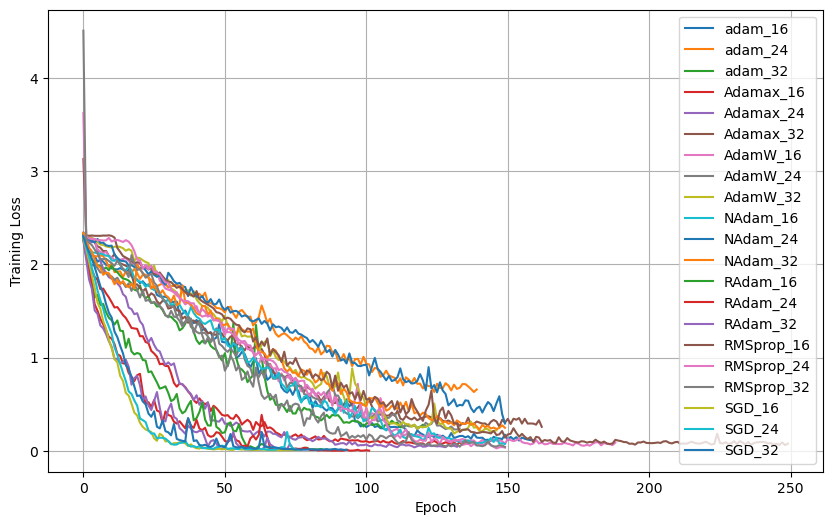

In [31]:
plot_losses(optimizer_batchsize)

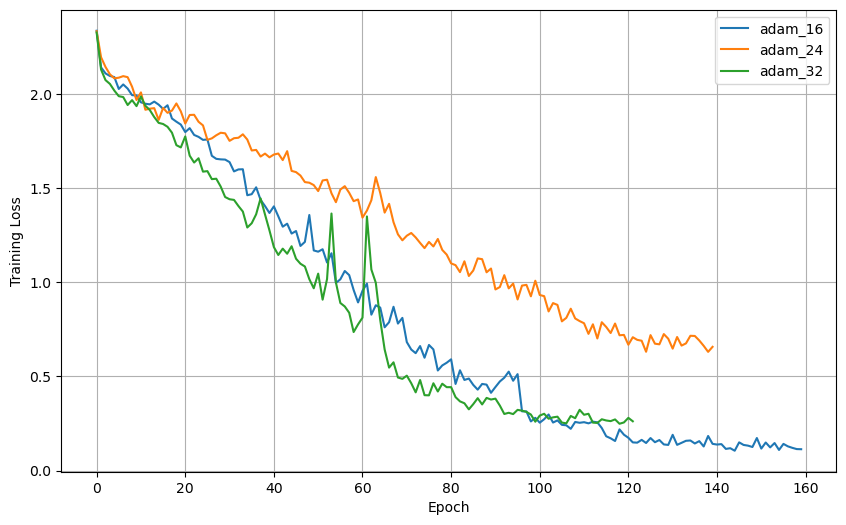

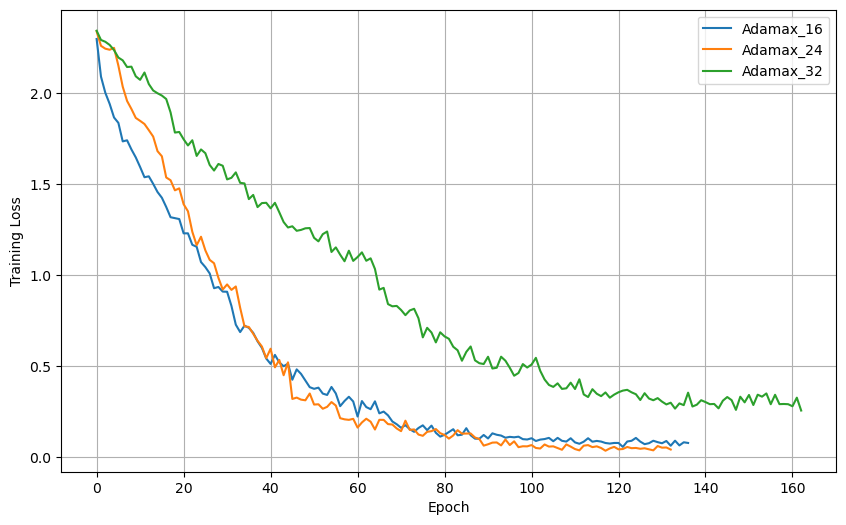

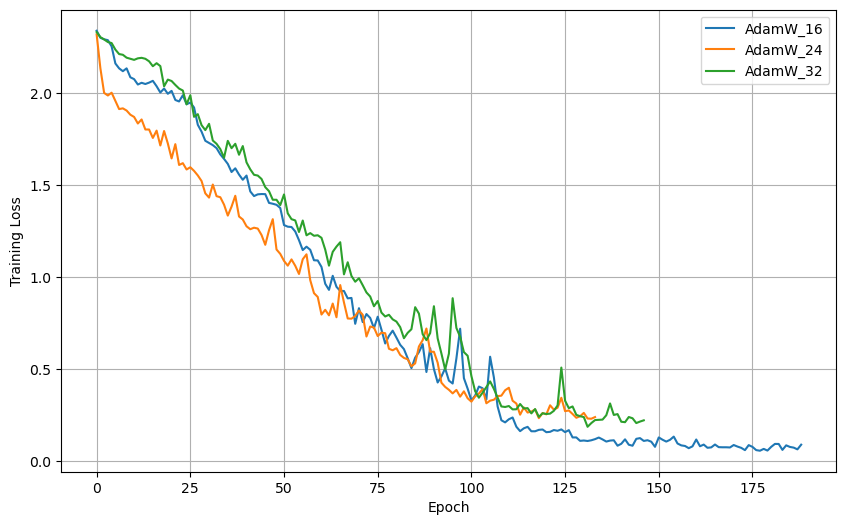

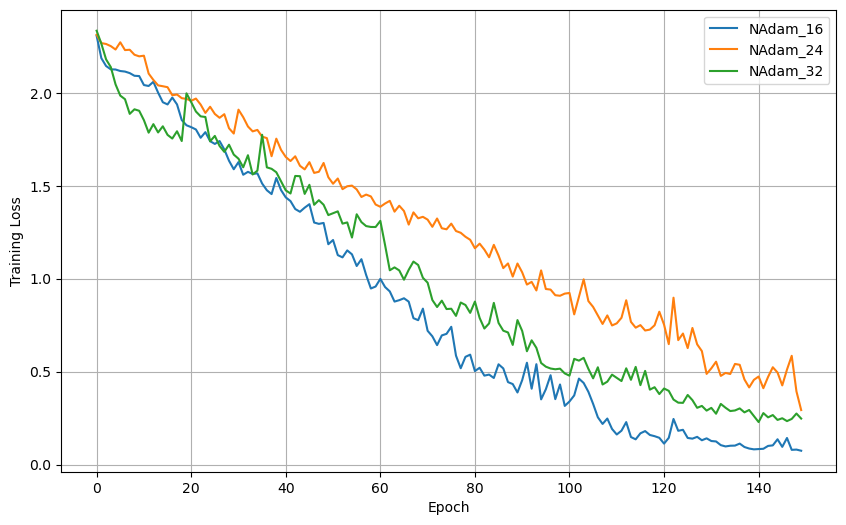

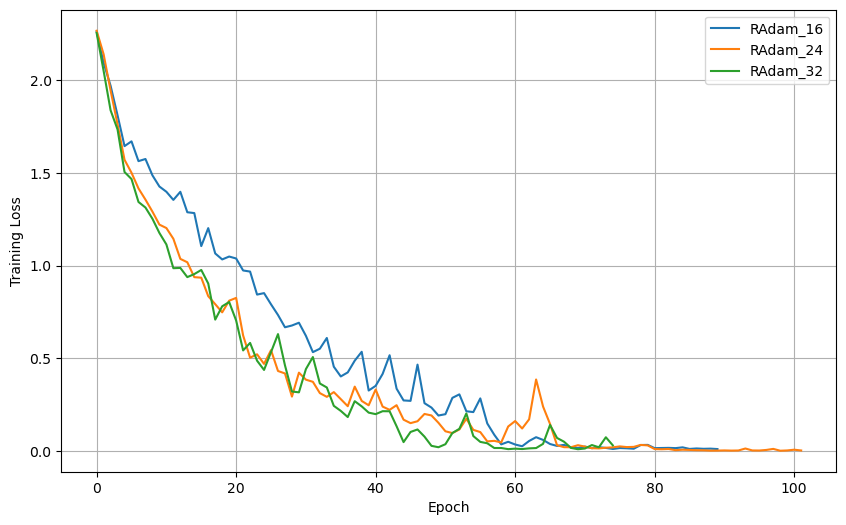

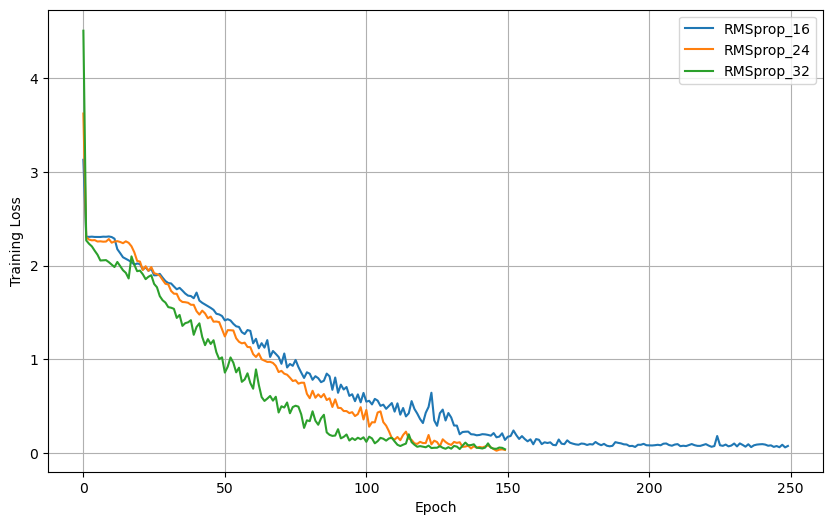

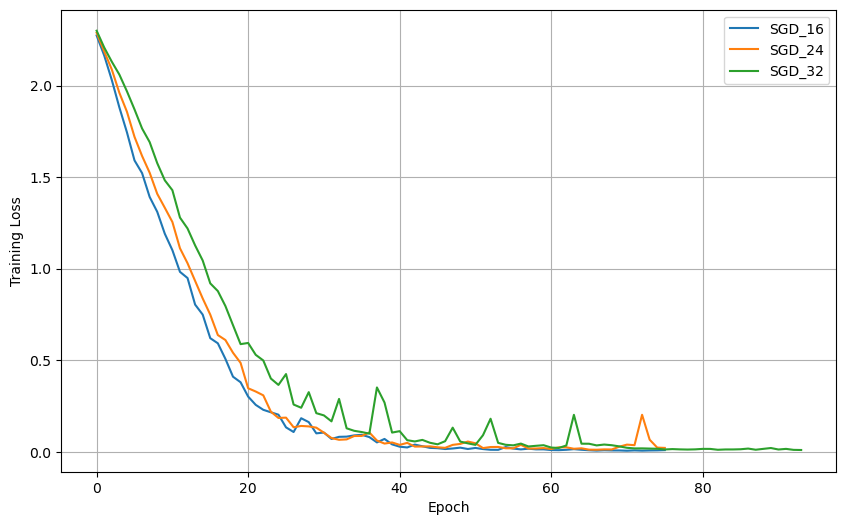

In [32]:
for optim in optimizers:
    objects = [o for o in optimizer_batchsize if o["optimizer"] == optim]
    plot_losses(objects)

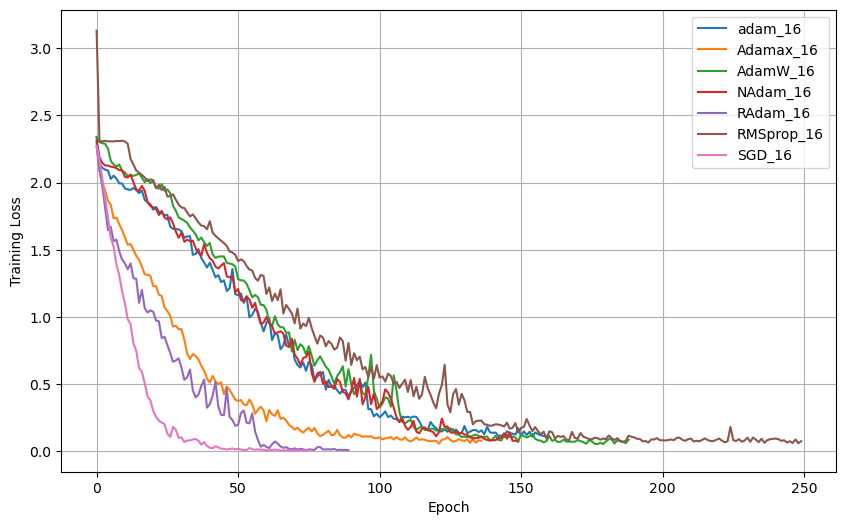

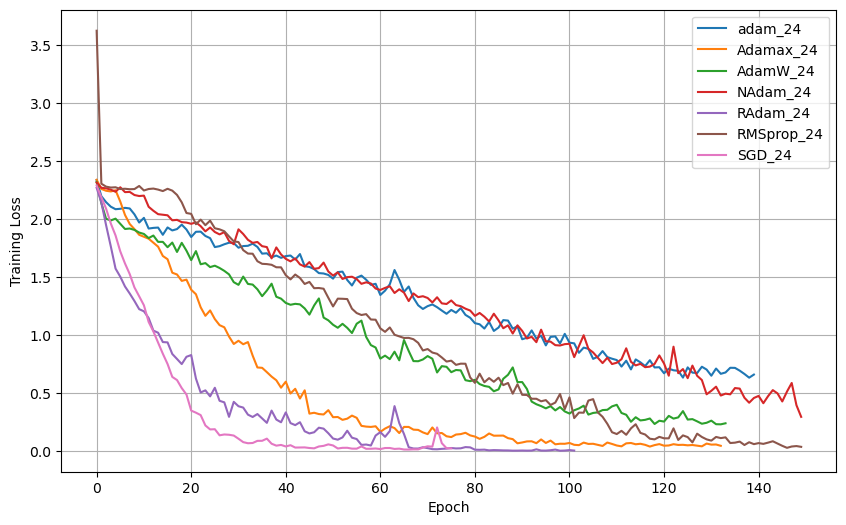

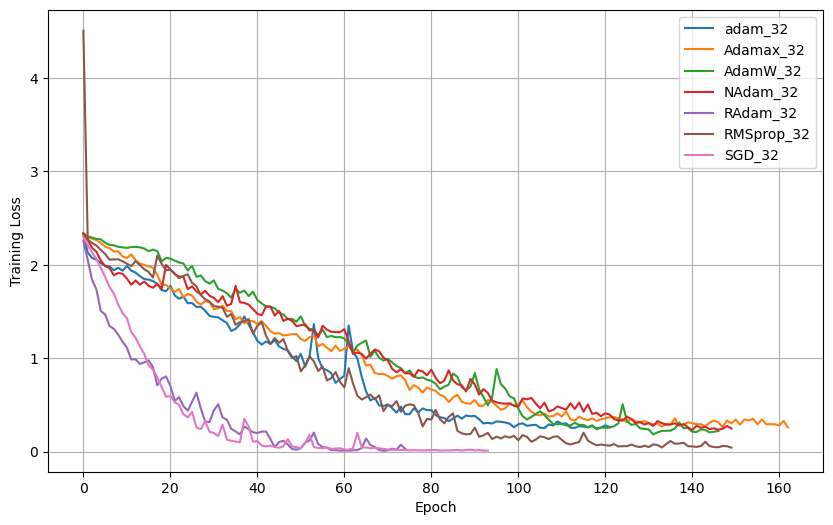

In [33]:
for batch_size in batch_sizes:
    objects = [o for o in optimizer_batchsize if o["batch_size"] == batch_size]
    plot_losses(objects)

In [34]:
import numpy as np

def calculate_smoothness(train_loss):
    loss_diff = np.diff(train_loss)
    smoothness = np.std(loss_diff)
    return smoothness

def analyze_train_loss(data):
    results = []
    
    for obj in data:
        name = obj["name"]
        df = obj["df"]
        
        train_loss = df["train_loss"].values
        smoothness = calculate_smoothness(train_loss)
        min_loss = train_loss.min()
        final_loss = train_loss[-1]
        
        results.append({
            "name": name,
            "smoothness": smoothness,
            "min_loss": min_loss,
            "final_loss": final_loss
        })
    
    results_df = pd.DataFrame(results)
    return results_df

In [36]:
results_df = analyze_train_loss(optimizer_batchsize)
results_df.sort_values("min_loss")

,name,smoothness,min_loss,final_loss
13,RAdam_24,0.064232,0.001000,0.002338
18,SGD_16,0.049031,0.005745,0.009089
14,RAdam_32,0.076580,0.009042,0.029973
20,SGD_32,0.066733,0.009693,0.009693
12,RAdam_16,0.071328,0.010020,0.010020
19,SGD_24,0.052179,0.011127,0.021096
16,RMSprop_24,0.115354,0.026015,0.034485
4,Adamax_24,0.040717,0.036858,0.043409
17,RMSprop_32,0.192446,0.041674,0.041674
6,AdamW_16,0.049584,0.054470,0.087331


In [37]:
results_df.sort_values("smoothness")

,name,smoothness,min_loss,final_loss
3,Adamax_16,0.036816,0.057869,0.079500
5,Adamax_32,0.039609,0.257286,0.257286
4,Adamax_24,0.040717,0.036858,0.043409
1,adam_24,0.048276,0.630819,0.657524
18,SGD_16,0.049031,0.005745,0.009089
6,AdamW_16,0.049584,0.054470,0.087331
0,adam_16,0.050700,0.105797,0.113779
9,NAdam_16,0.051278,0.074189,0.074189
19,SGD_24,0.052179,0.011127,0.021096
7,AdamW_24,0.053907,0.228546,0.237578
